## Python statistics essential training - 04_06_challenge

Standard imports

In [39]:
import math
import io

In [40]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [41]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [42]:
pop = pd.read_csv('grades.csv')

Esitmate the confidence interval for the fraction of citizen giving her a passing grade (>5)

In [43]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [44]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


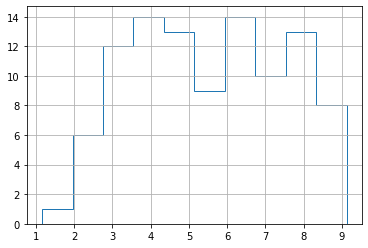

In [45]:
pop.grade.hist(histtype = 'step')

ok now we are going to start bootstraping.  which is basically resample from our population 100 times for that one value and make sure our replace is on

In [46]:
sum(pop.grade.sample(n=100, replace = True) >=5 )/ 100

0.56

The code above allow us to boot strap 1 time, now we just need to do it 100 times

In [47]:
perc_passing = []
for i in range(1000):
    perc_passing.append(sum(pop.grade.sample(n=100, replace = True) >=5 )/ 100)
df = pd.DataFrame({'perc_passing':perc_passing}).sort_values('perc_passing').reset_index(drop = True)
df

,perc_passing
0,0.42
1,0.43
2,0.44
3,0.44
4,0.45
...,...
995,0.69
996,0.69
997,0.70
998,0.72


Now all we need to do is find the confidence interveral of the percent passing 

In [48]:
df.describe()

,perc_passing
count,1000.000000
mean,0.572940
std,0.048059
min,0.420000
25%,0.540000
50%,0.570000
75%,0.610000
max,0.720000


now we use 0.569 and find quatile where 0.025 = 0.569 and 0.975 = 0.569.  The way the video do it is stupid.  so i will do it another way

In [49]:
confidence_level = 0.95
degree_of_freedom = 999 #(n-1)
mean = 0.569330
ste = 0.050719/ np.sqrt(1000) # standard error
confidence_interval = scipy.stats.t.interval(confidence_level, degree_of_freedom, mean, ste)
print(confidence_interval)

(0.5661826483989414, 0.5724773516010586)
